In [60]:
import geopandas as gpd
import rioxarray as rio
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image


In [82]:
#Load the crown polygons
crowns = gpd.read_file('data/tree_crowns.gpkg')

#Remove spaces at the end of the common name
crowns['common_name'] = crowns['common_name'].str.strip()

print(crowns['common_name'].value_counts())

#Select top three speceis
target_species = crowns['common_name'].value_counts().head(4).index.tolist()
print(target_species)

#Reduce the dataset to only the top three species
crowns = crowns[crowns['common_name'].isin(target_species)]

#Classify species into conniferous or deciduous
coniferous = ['Paper birch', 'Red maple']
deciduous = ['Balsam fir', 'Eastern white cedar']
crowns['species_type'] = None
crowns.loc[crowns['common_name'].isin(deciduous), 'species_type'] = 'deciduous'
crowns.loc[crowns['common_name'].isin(coniferous), 'species_type'] = 'coniferous'

#Randomly sample crowns from each species
crowns = crowns.groupby('common_name').apply(lambda x: x.sample(50, random_state=11), include_groups=True).reset_index(drop=True)

print(crowns['common_name'].value_counts())
print(crowns['species_type'].value_counts())


common_name
Paper birch            2692
Red maple              2361
Balsam fir             1438
Eastern white cedar     886
Sugar maple             424
Dead tree               409
Spruce                  398
White pine              227
Striped maple           195
Tamarack                181
Yellow birch            174
American beach           59
Eastern hemlock          51
Aspen                     3
Name: count, dtype: int64
['Paper birch', 'Red maple', 'Balsam fir', 'Eastern white cedar']
common_name
Balsam fir             50
Eastern white cedar    50
Paper birch            50
Red maple              50
Name: count, dtype: int64
species_type
deciduous     100
coniferous    100
Name: count, dtype: int64


C:\Users\hseely\AppData\Local\Temp\ipykernel_24348\3273859470.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  crowns = crowns.groupby('common_name').apply(lambda x: x.sample(50, random_state=11), include_groups=True).reset_index(drop=True)


In [83]:
crowns

label common_name  scientific_name          genus  crown_id  \
0    ABBA  Balsam fir   Abies balsamea      Pinaceae       8340   
1    ABBA  Balsam fir   Abies balsamea      Pinaceae       9399   
2    ABBA  Balsam fir   Abies balsamea      Pinaceae       2458   
3    ABBA  Balsam fir   Abies balsamea      Pinaceae       2492   
4    ABBA  Balsam fir   Abies balsamea      Pinaceae        567   
..    ...         ...              ...            ...       ...   
195  ACRU   Red maple     Acer rubrum    Sapindaceae       4890   
196  ACRU   Red maple     Acer rubrum    Sapindaceae       9262   
197  ACRU   Red maple     Acer rubrum    Sapindaceae       6177   
198  ACRU   Red maple     Acer rubrum    Sapindaceae       6182   
199  ACRU   Red maple     Acer rubrum    Sapindaceae       6001   

                                              geometry species_type  
0    MULTIPOLYGON (((577191.446 5093488.217, 577191...    deciduous  
1    MULTIPOLYGON (((576958.412 5093313.133, 576958...    deciduous  
2    MULTIPOLYGON (((577066.056 5093338.765, 577065...    deciduous  
3    MULTIPOLYGON (((577054.098 5093354.535, 577054...    deciduous  
4    MULTIPOLYGON (((577190.923 5093217.595, 577190...    deciduous  
..                                                 ...          ...  
195  MULTIPOLYGON (((577490.302 5093562.869, 577490...   coniferous  
196  MULTIPOLYGON (((577184.669 5093121.954, 577184...   coniferous  
197  MULTIPOLYGON (((577311.15 5093617.679, 577311....   coniferous  
198  MULTIPOLYGON (((577332.024 5093620.827, 577331...   coniferous  
199  MULTIPOLYGON (((577377.156 5093527.932, 577376...   coniferous  

[200 rows x 7 columns]

<Axes: >

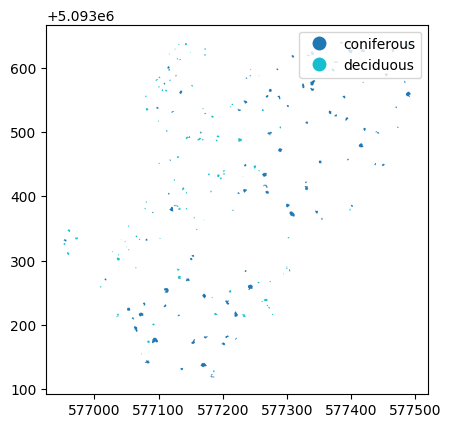

In [84]:
crowns.plot(column="species_type", legend=True)

In [85]:
#Add a new columns for bounding box coords for each crown
for bound in ['minx', 'miny', 'maxx', 'maxy']:
    crowns[bound] = crowns.bounds[bound]

crowns

label common_name  scientific_name          genus  crown_id  \
0    ABBA  Balsam fir   Abies balsamea      Pinaceae       8340   
1    ABBA  Balsam fir   Abies balsamea      Pinaceae       9399   
2    ABBA  Balsam fir   Abies balsamea      Pinaceae       2458   
3    ABBA  Balsam fir   Abies balsamea      Pinaceae       2492   
4    ABBA  Balsam fir   Abies balsamea      Pinaceae        567   
..    ...         ...              ...            ...       ...   
195  ACRU   Red maple     Acer rubrum    Sapindaceae       4890   
196  ACRU   Red maple     Acer rubrum    Sapindaceae       9262   
197  ACRU   Red maple     Acer rubrum    Sapindaceae       6177   
198  ACRU   Red maple     Acer rubrum    Sapindaceae       6182   
199  ACRU   Red maple     Acer rubrum    Sapindaceae       6001   

                                              geometry species_type  \
0    MULTIPOLYGON (((577191.446 5093488.217, 577191...    deciduous   
1    MULTIPOLYGON (((576958.412 5093313.133, 576958...    deciduous   
2    MULTIPOLYGON (((577066.056 5093338.765, 577065...    deciduous   
3    MULTIPOLYGON (((577054.098 5093354.535, 577054...    deciduous   
4    MULTIPOLYGON (((577190.923 5093217.595, 577190...    deciduous   
..                                                 ...          ...   
195  MULTIPOLYGON (((577490.302 5093562.869, 577490...   coniferous   
196  MULTIPOLYGON (((577184.669 5093121.954, 577184...   coniferous   
197  MULTIPOLYGON (((577311.15 5093617.679, 577311....   coniferous   
198  MULTIPOLYGON (((577332.024 5093620.827, 577331...   coniferous   
199  MULTIPOLYGON (((577377.156 5093527.932, 577376...   coniferous   

            minx          miny         maxx          maxy  
0    577189.0365  5.093486e+06  577192.0568  5.093488e+06  
1    576957.3289  5.093309e+06  576960.9351  5.093313e+06  
2    577064.1428  5.093336e+06  577066.9213  5.093339e+06  
3    577052.4109  5.093352e+06  577054.2873  5.093355e+06  
4    577186.6727  5.093215e+06  577191.7753  5.093218e+06  
..           ...           ...          ...           ...  
195  577485.2325  5.093555e+06  577493.1335  5.093564e+06  
196  577180.8011  5.093118e+06  577186.9156  5.093123e+06  
197  577307.0498  5.093616e+06  577311.3588  5.093620e+06  
198  577331.0218  5.093618e+06  577336.6594  5.093621e+06  
199  577374.3196  5.093524e+06  577378.2527  5.093528e+06  

[200 rows x 11 columns]

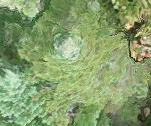

In [86]:
#Load the orthophoto
ortho = rio.open_rasterio('data/2021-08-18-sbl-z1-rgb-cog.tif')

#Load all crowns for each sp type into a dict
def clip_crown_from_ras(ortho, crown, target_res=None):

    #Clip the orthophoto to the crown bounding box
    crown_ras = ortho.rio.clip_box(minx=crown['minx'], 
                                    miny=crown['miny'], 
                                    maxx=crown['maxx'], 
                                    maxy=crown['maxy'])
    
    #Extract numpy array from rioxarray
    crown_ras = crown_ras.values

    #Convert to PIL image
    crown_ras = Image.fromarray(crown_ras.transpose(1,2,0))
    
    #Rescale image to target resolution
    if target_res is not None:

        rescale_img = transforms.Compose([transforms.Resize((target_res, target_res))])

        crown_ras = rescale_img(crown_ras)
        
    return crown_ras

clip_crown_from_ras(ortho, crowns.iloc[0], target_res=None)


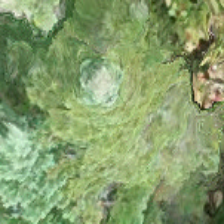

In [87]:
clip_crown_from_ras(ortho, crowns.iloc[0], target_res=224)

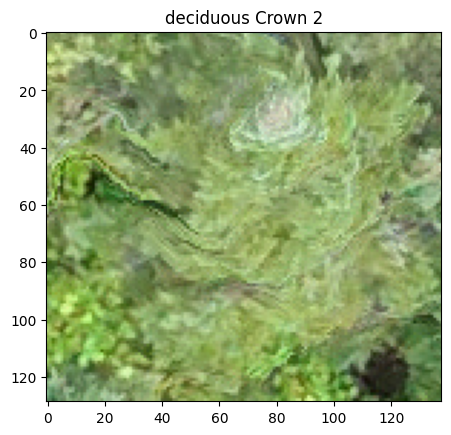

In [90]:
def plot_crown(ortho, crown_df, crown_id, ax=None, target_res=None):

    if ax is None:
        _, ax = plt.subplots()

    crown = crown_df.loc[crown_id]

    crown_img = clip_crown_from_ras(ortho, crown, target_res)
    
    ax.imshow(crown_img)

    #Add title to the plot showing species name and crown id
    ax.set_title(f"{crown['species_type']} Crown {crown_id}")

plot_crown(ortho, crowns, crown_id=2)

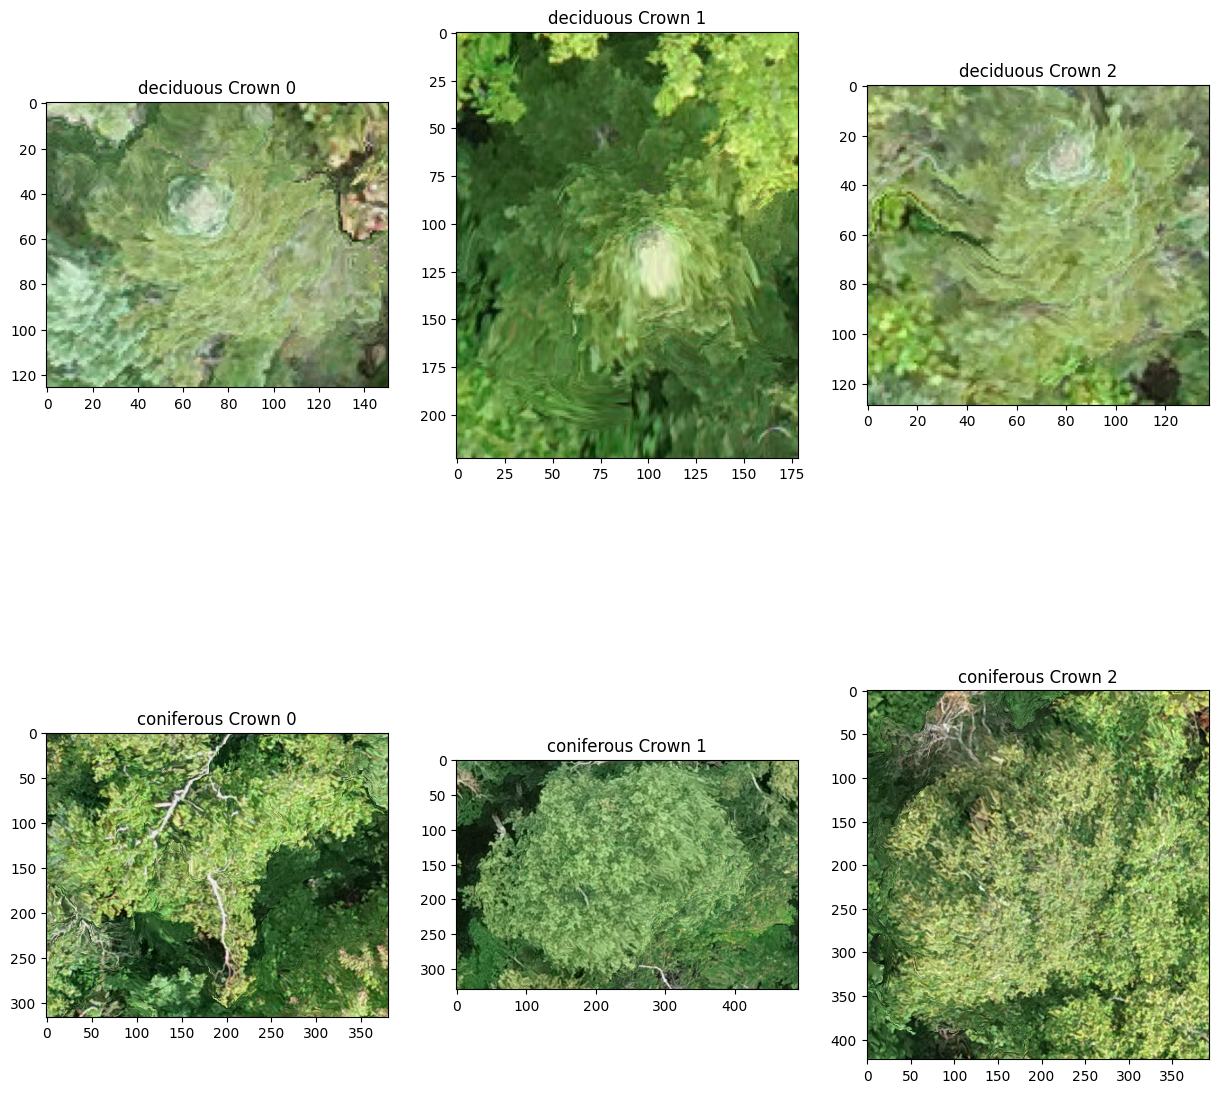

In [94]:
#Plot a grid of each tree species showing example crowns
fig, axs = plt.subplots(2, 3, figsize=(15, 15))

for row, sp in enumerate(crowns['species_type'].unique()):

    crowns_sp_sub = crowns[crowns['species_type'] == sp].reset_index(drop=True)

    for col in range(3):

        plot_crown(ortho, 
                   crowns_sp_sub, 
                   col,
                   ax=axs[row, col])


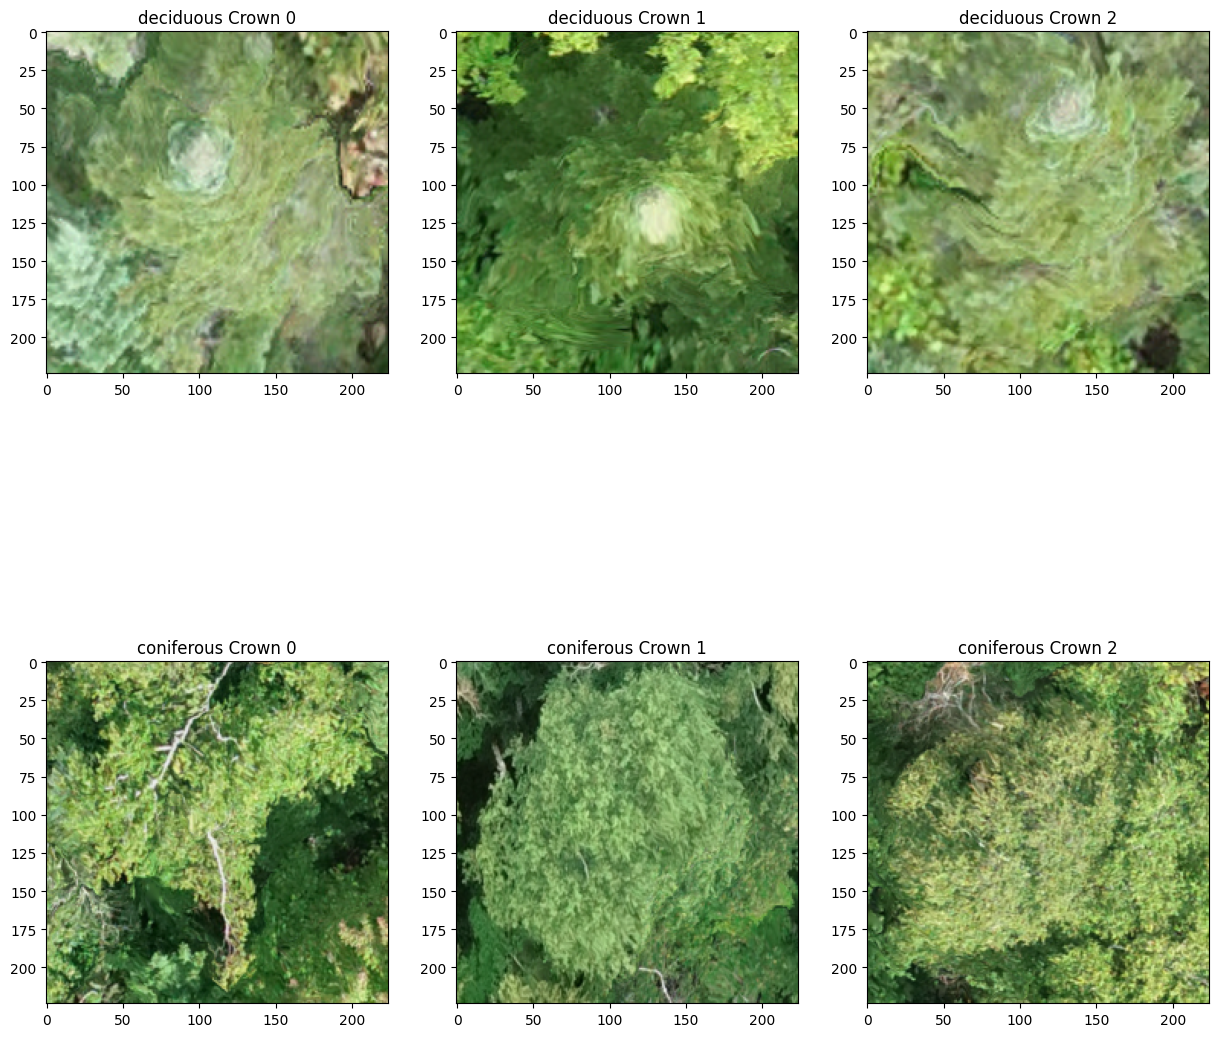

In [95]:
#Plot a grid of the same trees with 224x224 pixel resolution
#We need all images to be same dimensions to work in CNN
fig, axs = plt.subplots(2, 3, figsize=(15, 15))

for row, sp in enumerate(crowns['species_type'].unique()):

    crowns_sp_sub = crowns[crowns['species_type'] == sp].reset_index(drop=True)

    for col in range(3):

        plot_crown(ortho, 
                   crowns_sp_sub, 
                   col,
                   ax=axs[row, col],
                   target_res=224)


In [97]:
#Export images to folder

from tqdm.notebook import tqdm
import os

#Remove existing images
ls_existing = os.listdir('data/clipped_crowns')
for f in ls_existing:
    os.remove(f'data/clipped_crowns/{f}')

for id in tqdm(crowns['crown_id']):

    crown = crowns[crowns['crown_id'] == id]

    crown_img = clip_crown_from_ras(ortho, crown, target_res=224)

    crown_img.save(f'data/clipped_crowns/crown_{crown["crown_id"].values[0]}.png')


  0%|          | 0/200 [00:00<?, ?it/s]